Osnabrück University - Computer Vision (Winter Term 2017/18) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 01: Basic Operations - Convolution

## Introduction

This is a part of the first exercise sheet, you will find the rest in the `*.ipynb` file. The homework sheets will usually be available on Tuesdays and are supposed to be solved in groups of three. They have to be handed in before Monday morning of the following week. The exercises are then presented to your tutor in a small feedback session. To acquire the admission for the final exam, you will have to pass $N-2$ of the weekly provided exercise sheets.

Sign up for a group on Stud.IP (See `Participants` -> `Functions/Groups`). The times mentioned there are the times for the feedback session of your group. If none of them fits, send any of the tutors an e-mail so we can try to arrange something. 

Your group will have a group folder in Stud.IP under `Documents`. Upload your solutions there to hand them in.

All exercise sheets will use [Jupyter Notebooks](http://jupyter-notebook.readthedocs.org/en/latest/notebook.html). To be able to run these on your system, you will need to install Python and a few packages. We suggest you to use the latest version of Python 3. In case you are not familiar with it, follow the directives below ([Assignment -1a](#a%29-Install-Python)) to get it up and running. [Assignment -1b](#b%29-Run-Jupyter-Notebooks) on this sheet will provide details on how to run the notebooks with Jupyter.

This week's sheet should be solved and handed in before the end of **Sunday, November 12, 2017**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

We will offer an open help session if you need help with installing and getting things to run: On **Tuesday, November 7, 2017 between 9:00 and 13:00** you will find some tutors in **92/E06** who try to help you.

## Assignment 0: Setup your homework environment [0 Points]

Thie exercise gives you no points, but it is required to do the other exercises. If you have problems, do not hesitate to contact us.

### a) Install Conda

To be able to run Jupyter Notebooks you will need Python. Follow this exercise to get everything up and running.

We recommend to use Anaconda:
* Download and install Anaconda from https://www.continuum.io/downloads that contains all important Python packages.
* If you have limited diskspace install Miniconda https://conda.io/miniconda.html instead, which contains only conda and Python.

Follow the installation instructions on the web site.

### b) Setup the `cv` environment

Download `cv.yml` from Stud.IP. Then in a terminal navigate to the directory where you saved `cv.yml` and run

```sh
conda env create -f cv.yml 
```

### c) Activate the environment 

Always activate the enviornment when you work on the homework. 

Linux/Mac OS:

```sh
source activate cv
```
    
For Windows:
```sh
activate cv
```

### b) Run Jupyter Notebooks

After you installed Python and Jupyter verify you are able to run the notebook server by opening your command line, navigate to the directory where you downloaded the `sheet01.ipynb` to, e.g. `~/university/CV2016-17` or `C:\Users\Documents\University\CV2016-17` and run jupyter in that directory.

```sh
cd ~/university/CV2016-17
jupyter notebook
```

Usually a browser window should open up. If not, open your favorite webbrowser and navigate to [localhost:8888/tree](localhost:8888/tree).

You will be presented with a list of files, choose `sheet01.ipynb`: You are good to go now and can start working on your homework right away!

### c) Check your installation
Check that your installation succeeded and all required packages are available by executing the following cell (type <kbd>Ctrl</kbd>+<kbd>&#x23ce;</kbd>, on German keyboards <kbd>Strg</kbd>+<kbd>&#x23ce;</kbd>, or press the "run cell"-button at the toolbar above):

In [2]:
import importlib
assert importlib.util.find_spec('numpy') is not None , 'numpy not found'
assert importlib.util.find_spec('matplotlib') is not None, 'matplotlib not found'
assert importlib.util.find_spec('scipy') is not None , 'scipy not found'
print("Test")

Test


### Remarks:

* If you experience any troubles, remember to step by at the help session on **Tuesday, November 7, 2017 between 9:00 and 13:00** in room **92/E06** use the Stud.IP forum or send us an e-mail - we are always happy to help.
* In case you don't manage to install the required software on your computer, we can provide an installation that you can use in the CIP pool of the IKW. Contact the tutors.
* If you do not want to use Python to do the exercises, but prefer another programming language, you may ask the tutors if they are willing to support it. However, the practice sessions will focus on Python and will probably not cover other languages.

## Assignment 1: Twodimensional Convolution [8 Points]

This exercise is purely theoretical and does not require implementation.

### a) Definition

Describe in your own words how convolution works.

YOUR ANSWER HERE

### b) Properties
Is convolution linear or non-linear? Is it homogenous or inhomogenous? Proof your answers.

YOUR ANSWER HERE

### c) Complexity

Assume an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$. How many operations (additions and multiplications) are required to compute a convoluted image $g\ast k$ (of the same size as $g$)?

An Answer here: (Jan)
Depends on what is done at the borders of the image.
There are $(2m+1)*(2n+1)$ multiplications per pixel for which the kernel is applied. The image has $M*N$ pixels, so there are
$(2m+1)*(2n+1)*M*N$ multiplications to be done.
For every application of the kernel also $(2m+1)*(2n+1)$ additions have to be done. Again, the kernel is applied $M*N$ times, so $2*(2m+1)*(2n+1)*M*N$ have to be done in full

### d) Separability

What is a separable kernel? Describe, how it can be applied more efficiently. Compute the number of operations for getting $g\ast k$ (as in (c)) and compare the results.

YOUR ANSWER HERE

## Assignment 2: Applying Convolution [4 Points]

In this exercise you will apply convolution with different kernels. You may use the function `scipy.ndimage.filters.convolve` to solve this task. Check the documentation to learn how to use this function. 
Then realize the following filters, describe their effect and possible applications.

### a) Box filter

Usage: To smooth the pixelmap of an image.
The box filter kernel, since it has the value 1 in every cell, is easy to compute because only additions are necessary ($1*x = x$).
Lecture: Problem: “Hard” border causes harmonics (cf. Fourier transform).


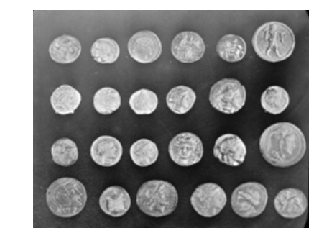

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

# Load an image
#image = misc.imread('some_file.png', mode = 'F')
image = data.coins().astype(np.float32)

# YOUR CODE HERE
# For further information see here: https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.ndimage.filters.convolve.html
import scipy # For being able to use the scipy.ndimage.filters.convolve-Function

# Box filter kernel
factor = 1/9 # for some reason makes no difference at all. Find out, why!
kernel = factor * np.array([[1,1,1],[1,1,1],[1,1,1]]) #3x3 box filter


#kernel = np.array([[1, 1, 1, 1, 1],[1, 1, 1, 1, 1],[1, 1, 1, 1, 1],[1, 1, 1, 1, 1],[1, 1, 1, 1, 1]]) # makes the image even more blurry
#kernel = np.array([[1]]) #This does nothing, because it multiplies every pixel by one

filtered_image = scipy.ndimage.filters.convolve(image, kernel) # applies the convolution-kernel to the image
#filtered_image = image # replace this by your solution

plt.figure()
plt.imshow(filtered_image, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

### b) Gaussian filter

You may try different filter sizes.

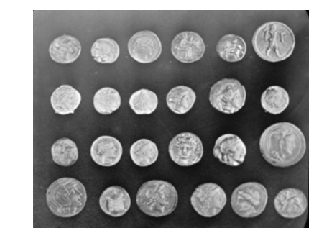

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

# Load an image
#image = misc.imread('some_file.png', mode = 'F')
image = data.coins().astype(np.float32)

# YOUR CODE HERE
import scipy # For being able to use the scipy.ndimage.filters.convolve-Function

# Gaussian filter kernels from the lecture
kernel_1x1 = 1/1 * np.array([[1]]) #no gaussian filter
kernel_3x3 = 1/16 * np.array([[1,2,1],[2,4,2],[1,2,1]]) #3x3 gaussian filter
kernel_4x4 = 1/64 * np.array([[1,3,3,1],[3,9,9,3],[3,9,9,3],[1,3,3,1]]) #4x4 gaussian filter
kernel_5x5 = 1/256 * np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1],]) #5x5 gaussian filter

filtered_image = scipy.ndimage.filters.convolve(image, kernel_3x3) # applies the convolution-kernel to the image
#filtered_image = image # replace this by your solution

plt.figure()
plt.imshow(filtered_image, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

### c) Sobel filter

Try horizontal, vertical, and diagonal sobel filters.

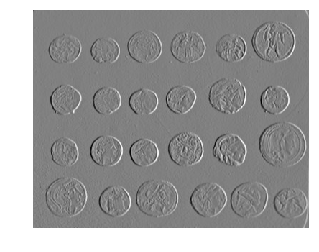

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

# Load an image
#image = misc.imread('some_file.png', mode = 'F')
image = data.coins().astype(np.float32)

# YOUR CODE HERE
import scipy # For being able to use the scipy.ndimage.filters.convolve-Function

#Implement Sobel Kernels form lecture
kernel_x_sobel = 1/4 * np.array([[1, 0, -1],[2,0,-2],[1,0,-1]]) #Vertical edge Sobel filter
kernel_x_sobel_inv = 1/4 * np.array([[-1, 0, 1],[-2,0,2],[-1,0,1]]) #Inverted Vertical edge Sobel filter
kernel_y_sobel = 1/4 * np.array([[1, 2, 1],[0,0,0],[-1,-2,-1]]) #Horizontal edge Sobel filter
kernel_d1_sobel = 1/4 * np.array([[0,-1,-2],[1,0,-1],[2,1,0]]) #Diagonal upper left to lower right Sobel filter
kernel_d2_sobel = 1/4 * np.array([[-2, -1, 0],[-1,0,1],[0,1,2]]) #Diagonal lower left to upper right Sobel filter

filtered_image = scipy.ndimage.filters.convolve(image, kernel_x_sobel_inv) # applies the convolution-kernel to the image
#filtered_image = image # replace this by your solution

plt.figure()
plt.imshow(filtered_image, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

### d) Laplace operator

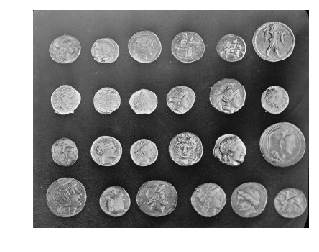

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

# Load an image
#image = misc.imread('some_file.png', mode = 'F')
image = data.coins().astype(np.float32)

# YOUR CODE HERE
filtered_image = image # replace this by your solution

plt.figure()
plt.imshow(filtered_image, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

## Assignment 3: Implementing Convolution [8 Points]

Now implement your own 2-dimensional convolution function. The function should take an image and a kernel a argument and return an image of the same size, containing the result of convolving the image with the kernel.

You may notice a problem at the boundaries of the image. Describe the problem and possible solutions. Implement at least one of them.

Then apply your function with different kernels. Compare the results with [Assignment 2](#Assignment-2:-Applying-Convolution-[4-Points]).

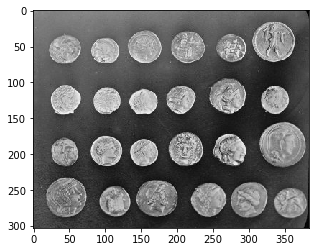

In [37]:
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np
from skimage import data

def get_grayvalue_fillup0(img, x, y):
    M, N = img.shape
    if x > M-1 or y > N-1 or x<0 or y<0:
        return 0
    else:
        return img[x, y]

def my_convolve2d(img, kern):
    """Convolve an image with a kernel.

    img -- the image, provided as a two-dimensional array
    kern -- the kernel, also a two-dimensional array
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kern.shape
    # and also the half kernel size
    mh, nh = (m//2, n//2)
    
    # Initialize the result matrix
    result = np.zeros((M,N))
    
    # Compute the convolution
    # YOUR CODE HERE
    import itertools
    get_pixel_func = get_grayvalue_fillup0 # The function that should be used to fill up pixels at borders
    
    # Iterate over every coordinate of the image
    for (x, y) in itertools.product(range(M), range(N)):
        new_val = 0 # Grayvalue of the here computed pixel
        
        # Iterate over every coordinate of the kernel
        for (i, j) in itertools.product(range(m), range(m)):
            #multiply the pixel grayvalue (using the border fillup function) with the kernel
            new_val += get_pixel_func(img, x-mh+i, y-nh+j)*kern[i, j]
        result[x][y] = new_val
    return result

# Apply your function to an image:
# Try different filters, compare the results with Assignment 2

# Load the image
image = data.coins().astype(np.float32)

box_1 = np.asarray([[1]])
box_3 = 1/9 * np.asarray([[1,1,1],[1,1,1],[1,1,1]])
filtered_image = my_convolve2d(image,box_1)

plt.figure()
plt.imshow(filtered_image, cmap = plt.get_cmap('gray'))
plt.show()